# Importing Dataset and pre processing

In [ ]:
import pandas as pd
df=pd.read_csv('ais_disabling_events_test.csv')
df = df.drop('score', axis=1)
df.head()

,gap_hours,iuu_caught,spherical_distances,eez_check,exact _name new from diff Oceans,gear type,speed,ais_disable_time_division
0,13.016667,0,207.942845,0,North Atlantic Ocean,pole_and_line,15.975123,Morning
1,13.850000,0,9.704232,0,South Atlantic Ocean,fishing,0.700667,Dawn
2,33.733333,0,10.789069,1,North Atlantic Ocean,pole_and_line,0.319834,Dawn
3,30.650000,0,11.695860,1,North Atlantic Ocean,pole_and_line,0.381594,Afternoon
4,50.283333,0,93.113335,1,North Atlantic Ocean,pole_and_line,1.851773,Afternoon


In [ ]:
df.shape

(55368, 8)

In [ ]:
df['iuu_caught'].value_counts()

0    55129
1      239
Name: iuu_caught, dtype: int64

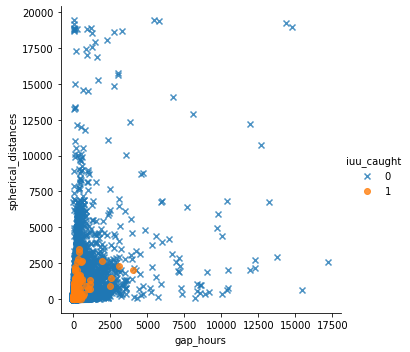

In [ ]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='spherical_distances', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=df)

In [ ]:
index_names = df[df['gap_hours'] >= 5000].index
df.drop(index_names, inplace = True)

index_names = df[df['spherical_distances'] >= 7000].index
df.drop(index_names, inplace = True)

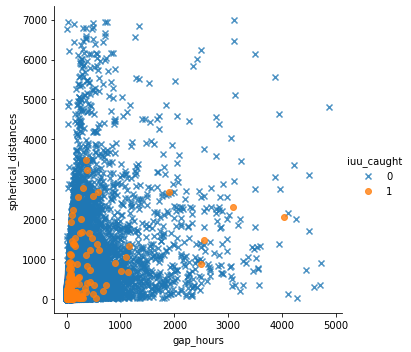

In [ ]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='spherical_distances', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=df)

<ipython-input-7-d755c1f20fae>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


Correlation matrix is : 
                     gap_hours  iuu_caught  spherical_distances  eez_check  \
gap_hours             1.000000    0.026771             0.432375   0.036147   
iuu_caught            0.026771    1.000000             0.021905  -0.013338   
spherical_distances   0.432375    0.021905             1.000000   0.065051   
eez_check             0.036147   -0.013338             0.065051   1.000000   
speed                -0.124339   -0.003477             0.357743   0.083598   

                        speed  
gap_hours           -0.124339  
iuu_caught          -0.003477  
spherical_distances  0.357743  
eez_check            0.083598  
speed                1.000000  


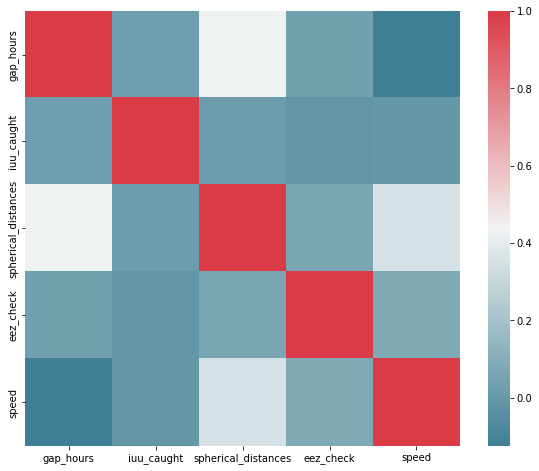

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

## One Hot Encoding


In [ ]:
print(df['gear type'].unique())
print(df['exact _name new from diff Oceans'].unique())
print(df['ais_disable_time_division'].unique())

['pole_and_line' 'fishing' 'set_longlines' 'fixed_gear' 'set_gillnets'
 'pots_and_traps' 'seiners' 'other_purse_seines' 'purse_seines' 'trollers'
 'dredge_fishing' 'drifting_longlines' 'other' 'trawlers' 'other_seines'
 'squid_jigger' 'tuna_purse_seines']
['North Atlantic Ocean' 'South Atlantic Ocean' 'Celtic Sea'
 'Southern Ocean' 'Mediterranean Sea - Eastern Basin' 'Norwegian Sea'
 'Barentsz Sea' 'Sea of Okhotsk' 'Japan Sea' 'Bering Sea' 'Gulf of Alaska'
 'Labrador Sea' 'Davis Strait' 'North Pacific Ocean' 'South Pacific Ocean'
 'Arafura Sea' 'Arabian Sea' 'Indian Ocean' 'Tasman Sea' 'Bismarck Sea'
 'Gulf of Guinea' 'Coral Sea' 'Bay of Bengal' 'Great Australian Bight'
 'Mozambique Channel' 'Caribbean Sea' 'Philippine Sea' 'Timor Sea'
 'Greenland Sea' 'North Sea' 'Laccadive Sea' 'Bass Strait'
 'Gulf of St. Lawrence' 'Baffin Bay' 'Gulf of Mexico' 'Solomon Sea']
['Morning' 'Dawn' 'Afternoon' 'Night' 'Twilight' 'Evening']


In [ ]:
print(df['gear type'].value_counts())
print(df['exact _name new from diff Oceans'].value_counts())
print(df['ais_disable_time_division'].value_counts())

drifting_longlines    18602
squid_jigger          15450
tuna_purse_seines      8596
trawlers               7887
fishing                1906
set_longlines          1317
pole_and_line           597
pots_and_traps          386
fixed_gear              180
set_gillnets             81
purse_seines             75
trollers                 72
other                    34
other_purse_seines       30
dredge_fishing           24
seiners                   2
other_seines              2
Name: gear type, dtype: int64
North Pacific Ocean                  16068
South Pacific Ocean                  13352
South Atlantic Ocean                 11070
Indian Ocean                          5737
North Atlantic Ocean                  4741
Bering Sea                            1169
Coral Sea                              398
Sea of Okhotsk                         374
Barentsz Sea                           331
Gulf of Guinea                         287
Celtic Sea                             276
Arabian Sea          

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['gear type', 'exact _name new from diff Oceans','ais_disable_time_division'])
print(one_hot_encoded_data.head())

   gap_hours  iuu_caught  spherical_distances  eez_check      speed  \
0  13.016667           0           207.942845          0  15.975123   
1  13.850000           0             9.704232          0   0.700667   
2  33.733333           0            10.789069          1   0.319834   
3  30.650000           0            11.695860          1   0.381594   
4  50.283333           0            93.113335          1   1.851773   

   gear type_dredge_fishing  gear type_drifting_longlines  gear type_fishing  \
0                         0                             0                  0   
1                         0                             0                  1   
2                         0                             0                  0   
3                         0                             0                  0   
4                         0                             0                  0   

   gear type_fixed_gear  gear type_other  ...  \
0                     0                0  .

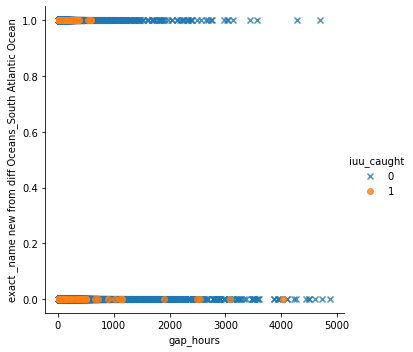

In [ ]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='exact _name new from diff Oceans_South Atlantic Ocean', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=one_hot_encoded_data)

## Test Train Split after One Hot Encoding

In [ ]:
#### Independent and Dependent Features
X=one_hot_encoded_data.drop("iuu_caught",axis=1)
y=one_hot_encoded_data.iuu_caught

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0    33001
1      143
Name: iuu_caught, dtype: int64

# Normal ANN

In [ ]:
print(len(X.columns))
n_inputs=len(X.columns)

63


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
# define model

model = keras.Sequential([
        keras.layers.Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# model = Sequential()
# # define first hidden layer and visible layer
# model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# # define output layer
# model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1036/1036 [==============================] - 3s 2ms/step - loss: 0.1266
Epoch 2/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0659
Epoch 3/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0513
Epoch 4/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0542
Epoch 5/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0417
Epoch 6/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0373
Epoch 7/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0330
Epoch 8/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0292
Epoch 9/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0318
Epoch 10/10
1036/1036 [==============================] - 2s 2ms/step - loss: 0.0273


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

691/691 [==============================] - 1s 1ms/step
0.7691904155871702


In [ ]:
y_pred1

array([[0.03515455],
       [0.00080572],
       [0.00807872],
       ...,
       [0.01455363],
       [0.01011587],
       [0.0134244 ]], dtype=float32)

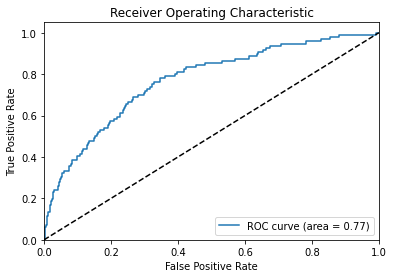

0.008623889


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


import numpy as np

# Find the index of the threshold that minimizes the Euclidean distance from (0,1)
idx = np.argmin((1-tpr)**2 + fpr**2)

# Retrieve the optimal threshold
optimal_threshold = thresholds[idx]

print(optimal_threshold)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred1_rounded = np.where(y_pred1 > 0.0024554702, 1, 0)
print(classification_report(y_test, y_pred1_rounded))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred1_rounded)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.45      0.62     22001
           1       0.01      0.86      0.01        96

    accuracy                           0.46     22097
   macro avg       0.50      0.66      0.32     22097
weighted avg       0.99      0.46      0.62     22097

[[ 9992 12009]
 [   13    83]]


# Cost Sensitive Learning 

In [ ]:
weights_assigned={0:1,1:550}

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix , classification_report

# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(n_inputs, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(30, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=50)

Epoch 1/50
1036/1036 [==============================] - 3s 2ms/step - loss: 20.5079
Epoch 2/50
1036/1036 [==============================] - 3s 2ms/step - loss: 9.4317
Epoch 3/50
1036/1036 [==============================] - 6s 5ms/step - loss: 11.2549
Epoch 4/50
1036/1036 [==============================] - 7s 7ms/step - loss: 6.2033
Epoch 5/50
1036/1036 [==============================] - 6s 6ms/step - loss: 5.3327
Epoch 6/50
1036/1036 [==============================] - 6s 5ms/step - loss: 3.3573
Epoch 7/50
1036/1036 [==============================] - 4s 4ms/step - loss: 2.0813
Epoch 8/50
1036/1036 [==============================] - 4s 4ms/step - loss: 1.9312
Epoch 9/50
1036/1036 [==============================] - 3s 2ms/step - loss: 2.3693
Epoch 10/50
1036/1036 [==============================] - 2s 2ms/step - loss: 3.1496
Epoch 11/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.1186
Epoch 12/50
1036/1036 [==============================] - 2s 2ms/step - loss: 2.5078

In [ ]:
y_pred=model.predict(X_test)

691/691 [==============================] - 1s 1ms/step


In [ ]:
np.mean(y_pred)

0.4910623

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.7858193945729739

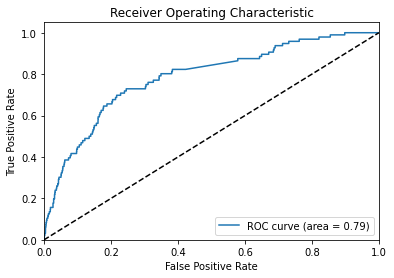

0.7145318


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

import numpy as np

# Find the index of the threshold that minimizes the Euclidean distance from (0,1)
idx = np.argmin((1-tpr)**2 + fpr**2)

# Retrieve the optimal threshold
optimal_threshold = thresholds[idx]

print(optimal_threshold)

In [ ]:
y_pred_rounded = np.where(y_pred > optimal_threshold, 1, 0)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rounded))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     22001
           1       0.01      0.72      0.02        96

    accuracy                           0.75     22097
   macro avg       0.51      0.74      0.44     22097
weighted avg       0.99      0.75      0.86     22097

[[16601  5400]
 [   27    69]]


# XGBoost

In [ ]:
# estimate a value for the scale_pos_weight xgboost hyperparameter
from sklearn.datasets import make_classification
from collections import Counter
# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
print(counter)

Estimate: 230.776
Counter({0: 33001, 1: 143})


In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
# define model
xgb = XGBClassifier(scale_pos_weight=1000)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.87897


In [ ]:
# Fitting the classifier on training data
xgb.fit(X_train, y_train)

# Making predictions on test data
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     22001
           1       0.01      0.79      0.03        96

    accuracy                           0.76     22097
   macro avg       0.51      0.77      0.44     22097
weighted avg       0.99      0.76      0.86     22097

[[16656  5345]
 [   20    76]]


In [ ]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model_temp = XGBClassifier()
# define grid
weights = [1, 10, 25, 50, 75, 100, 230, 250, 500, 750, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_temp, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827778 using {'scale_pos_weight': 1000}
0.000000 (0.000000) with: {'scale_pos_weight': 1}
0.009365 (0.023888) with: {'scale_pos_weight': 10}
0.144762 (0.106214) with: {'scale_pos_weight': 25}
0.405714 (0.113578) with: {'scale_pos_weight': 50}
0.465556 (0.130043) with: {'scale_pos_weight': 75}
0.542857 (0.144064) with: {'scale_pos_weight': 100}
0.687143 (0.138162) with: {'scale_pos_weight': 230}
0.713175 (0.121478) with: {'scale_pos_weight': 250}
0.790317 (0.103648) with: {'scale_pos_weight': 500}
0.806667 (0.093989) with: {'scale_pos_weight': 750}
0.827778 (0.092329) with: {'scale_pos_weight': 1000}


# Logistic Regression

In [ ]:
# weighted logistic regression for class imbalance with heuristic weights
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
weights_assigned_lr={0:1,1:230}
model_lr = LogisticRegression(solver='lbfgs', class_weight=weights_assigned_lr)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_lr, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.837


In [ ]:
# Fitting the classifier on training data
model_lr.fit(X_train, y_train)

# Making predictions on test data
y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     22001
           1       0.01      0.74      0.02        96

    accuracy                           0.74     22097
   macro avg       0.51      0.74      0.44     22097
weighted avg       0.99      0.74      0.85     22097

[[16355  5646]
 [   25    71]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# grid search class weights with logistic regression for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
model_lr_gs = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:2}, {0:1,1:10}, {0:1,1:100}, {0:1,1:200}, {0:1,1:230}, {0:1,1:250}, {0:1,1:500}, {0:1,1:750}, {0:1,1:1000}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_lr_gs, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.927937 using {'class_weight': {0: 1, 1: 1000}}
0.000000 (0.000000) with: {'class_weight': {0: 1, 1: 2}}
0.011905 (0.026620) with: {'class_weight': {0: 1, 1: 10}}
0.638413 (0.129438) with: {'class_weight': {0: 1, 1: 100}}
0.750476 (0.117125) with: {'class_weight': {0: 1, 1: 200}}
0.775873 (0.115842) with: {'class_weight': {0: 1, 1: 230}}
0.791429 (0.115027) with: {'class_weight': {0: 1, 1: 250}}
0.864127 (0.095228) with: {'class_weight': {0: 1, 1: 500}}
0.911429 (0.067809) with: {'class_weight': {0: 1, 1: 750}}
0.927937 (0.057967) with: {'class_weight': {0: 1, 1: 1000}}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# grid search class weights with logistic regression for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define model
model_lr_gs = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:2}, {0:1,1:10}, {0:1,1:100}, {0:1,1:200}, {0:1,1:230}, {0:1,1:250}, {0:1,1:500}, {0:1,1:750}, {0:1,1:1000}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_lr_gs, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836852 using {'class_weight': {0: 1, 1: 230}}
0.828657 (0.059543) with: {'class_weight': {0: 1, 1: 2}}
0.832004 (0.058225) with: {'class_weight': {0: 1, 1: 10}}
0.835330 (0.055008) with: {'class_weight': {0: 1, 1: 100}}
0.835868 (0.051855) with: {'class_weight': {0: 1, 1: 200}}
0.836852 (0.051562) with: {'class_weight': {0: 1, 1: 230}}
0.834642 (0.051406) with: {'class_weight': {0: 1, 1: 250}}
0.836213 (0.047974) with: {'class_weight': {0: 1, 1: 500}}
0.831653 (0.048348) with: {'class_weight': {0: 1, 1: 750}}
0.827474 (0.047409) with: {'class_weight': {0: 1, 1: 1000}}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Ensemble with LR and XGboost

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the ensemble model
ensemble = VotingClassifier(estimators=[('xgb', xgb), ('lr', model_lr)], voting='soft')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Making predictions on test data
y_pred_ensemble = ensemble.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ensemble))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     22001
           1       0.02      0.76      0.03        96

    accuracy                           0.79     22097
   macro avg       0.51      0.77      0.46     22097
weighted avg       0.99      0.79      0.88     22097

[[17328  4673]
 [   23    73]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest very bad

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

weights_assigned1={0:1,1:2}
# Initializing Random Forest classifier with class weights
clf = RandomForestClassifier(class_weight='balanced')

# Fitting the classifier on training data
clf.fit(X_train, y_train)

# Making predictions on test data
y_pred_clf = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_clf))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_clf)
print(cm)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.00      0.00      0.00        96

    accuracy                           1.00     22097
   macro avg       0.50      0.50      0.50     22097
weighted avg       0.99      1.00      0.99     22097

[[21998     3]
 [   96     0]]


# Weighted SVM very bad

In [ ]:
# svm with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# define model
model_svm = SVC(gamma='scale', class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_svm, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

KeyboardInterrupt: ignored

In [ ]:
# svm with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# define model
weights_assigned_svm={0:1,1:230}
model_svm = SVC(gamma='scale', class_weight=weights_assigned_svm)

# Fitting the classifier on training data
model_svm.fit(X_train, y_train)

# Making predictions on test data
y_pred_svm = model_svm.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     22001
           1       0.01      0.32      0.01        96

    accuracy                           0.80     22097
   macro avg       0.50      0.56      0.45     22097
weighted avg       0.99      0.80      0.89     22097

[[17713  4288]
 [   65    31]]


# Decision Trees very bad

In [ ]:
# decision tree with class weight on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define model
weights_assigned_dt={0:1,1:300}
model_dt = DecisionTreeClassifier(class_weight=weights_assigned_dt)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_dt, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.516


In [ ]:
# Fitting the classifier on training data
model_dt.fit(X_train, y_train)

# Making predictions on test data
y_pred_dt = model_dt.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.01      0.01      0.01        96

    accuracy                           0.99     22097
   macro avg       0.50      0.50      0.50     22097
weighted avg       0.99      0.99      0.99     22097

[[21897   104]
 [   95     1]]


# Stacking

>lr 0.000 (0.000)


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>knn 0.000 (0.000)


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>cart 0.250 (0.071)
>svm 0.000 (0.000)


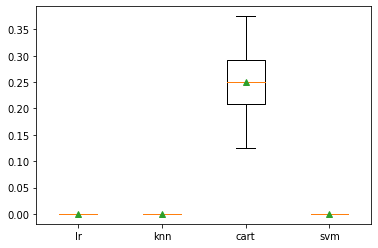

In [ ]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# level1 = model
# define the stacking ensemble
model1 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model1.fit(X, y)
# make a prediction for one example
yhat = model.predict(y_test)
print('Predicted Class: %d' % (yhat))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

NotFittedError: ignored

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_stacking))

from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred_stacking)
print(cm)

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost

dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = xgboost.XGBClassifier()
clf = [('dtc',dtc),('rfc',rfc),('ann',model),('xgb',xgb)] #list of (str, estimator)
lr = LogisticRegression()
stack_model = StackingClassifier(estimators = clf,final_estimator = lr)

y_pred_stacking = stack_model.predict(X_test)

AttributeError: ignored

# Stacking 2

In [ ]:
import pandas as pd
import numpy as np
import copy as cp

from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import StratifiedKFold, train_test_split, PredefinedSplit, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

from collections.abc import Iterable
from more_itertools import powerset

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

RANDOM_STATE : int = 42
TARGET_NAME : str = "target"

In [ ]:
!pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model3 = Sequential()
    # define first hidden layer and visible layer
    model3.add(Dense(n_inputs, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    model3.add(Dense(30, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    model3.add(Dense(10, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
    # define output layer
    model3.add(Dense(1, activation='sigmoid'))
    # define loss and optimizer
    model3.compile(loss='binary_crossentropy', optimizer='adam')
    return model3


model4 = KerasClassifier(model=create_model, verbose=0)


level_0_classifiers = dict()
level_0_classifiers["logreg"] = LogisticRegression(random_state=RANDOM_STATE)
level_0_classifiers["forest"] = RandomForestClassifier(random_state=RANDOM_STATE)
level_0_classifiers["xgboost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
level_0_classifiers["xtrees"] = ExtraTreesClassifier(random_state=RANDOM_STATE)
level_0_classifiers["ann"] = model4

level_1_classifier = ExtraTreesClassifier(random_state=RANDOM_STATE)

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
stacking_model = StackingClassifier(estimators=list(level_0_classifiers.items()), final_estimator=level_1_classifier, passthrough=True, cv=kfold, stack_method="predict_proba")


In [ ]:
level_0_columns = [f"{name}_prediction" for name in level_0_classifiers.keys()]
pd.DataFrame(stacking_model.fit_transform(X_train, y_train), columns=level_0_columns + list(X_train.columns))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,logreg_prediction,forest_prediction,xgboost_prediction,xtrees_prediction,ann_prediction,gap_hours,spherical_distances,eez_check,score,speed,...,exact _name new from diff Oceans_South Pacific Ocean,exact _name new from diff Oceans_Southern Ocean,exact _name new from diff Oceans_Tasman Sea,exact _name new from diff Oceans_Timor Sea,ais_disable_time_division_Afternoon,ais_disable_time_division_Dawn,ais_disable_time_division_Evening,ais_disable_time_division_Morning,ais_disable_time_division_Night,ais_disable_time_division_Twilight
0,0.012245,0.00,0.016238,0.0,6.276869e-09,461.750000,308.923179,1.0,91.0,0.669027,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.011749,0.01,0.056839,0.0,1.017744e-03,13.716667,2.480992,0.0,89.0,0.180874,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.030018,0.00,0.011423,0.0,3.132713e-14,98.700000,783.791911,0.0,94.0,7.941154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000279,0.00,0.000278,0.0,1.296512e-04,12.850000,28.226168,0.0,89.0,2.196589,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000289,0.00,0.000463,0.0,5.331431e-05,12.983333,58.975136,1.0,98.0,4.542372,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33139,0.003355,0.00,0.003381,0.0,3.022181e-32,489.183333,708.782853,1.0,91.0,1.448910,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33140,0.001533,0.00,0.000408,0.0,1.422381e-04,13.133333,43.714577,0.0,91.0,3.328521,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33141,0.001336,0.00,0.000358,0.0,1.882824e-04,12.616667,60.341627,0.0,86.0,4.782692,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
33142,0.000402,0.00,0.000402,0.0,2.286237e-04,16.100000,59.259190,0.0,89.0,3.680695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_explain_sklearn = pd.DataFrame()

for name, classifier in level_0_classifiers.items():
    classifier_ = cp.deepcopy(classifier)
    classifier_.fit(X_train, y_train)
    
    y_predict_proba = classifier_.predict_proba(X_train)[:, 1]
    df_explain_sklearn = pd.concat([df_explain_sklearn, pd.DataFrame(y_predict_proba, columns=[f"{name}_prediction"])], axis=1)

df_explain_sklearn

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,logreg_prediction,forest_prediction,xgboost_prediction,xtrees_prediction,ann_prediction
0,0.012245,0.00,0.016238,0.0,1.106922e-01
1,0.011749,0.01,0.056839,0.0,1.857508e-02
2,0.030018,0.00,0.011423,0.0,1.291440e-06
3,0.000279,0.00,0.000278,0.0,5.442139e-03
4,0.000289,0.00,0.000463,0.0,2.582180e-03
...,...,...,...,...,...
33139,0.003355,0.00,0.003381,0.0,5.979902e-08
33140,0.001533,0.00,0.000408,0.0,5.700632e-03
33141,0.001336,0.00,0.000358,0.0,4.304196e-03
33142,0.000402,0.00,0.000402,0.0,2.972181e-03


In [ ]:
pd.DataFrame(stacking_model.transform(X_test), columns=level_0_columns + list(X_train.columns))

,logreg_prediction,forest_prediction,xgboost_prediction,xtrees_prediction,ann_prediction,gap_hours,spherical_distances,eez_check,score,speed,...,exact _name new from diff Oceans_South Pacific Ocean,exact _name new from diff Oceans_Southern Ocean,exact _name new from diff Oceans_Tasman Sea,exact _name new from diff Oceans_Timor Sea,ais_disable_time_division_Afternoon,ais_disable_time_division_Dawn,ais_disable_time_division_Evening,ais_disable_time_division_Morning,ais_disable_time_division_Night,ais_disable_time_division_Twilight
0,0.005299,0.01,0.006812,0.00,1.556109e-15,203.266667,509.004605,1.0,98.0,2.504122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.015085,0.00,0.034142,0.01,0.000000e+00,1316.066667,2494.276343,0.0,98.0,1.895251,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000593,0.00,0.000248,0.00,1.737492e-05,21.433333,135.912913,0.0,88.0,6.341193,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.002141,0.00,0.000937,0.00,4.784448e-11,49.850000,649.387351,1.0,94.0,13.026828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.003090,0.04,0.001855,0.18,4.689996e-04,21.400000,55.797219,0.0,91.0,2.607347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,0.000450,0.00,0.000199,0.00,2.900815e-04,13.283333,6.685679,0.0,94.0,0.503313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22093,0.001618,0.00,0.001864,0.00,4.239138e-04,12.850000,16.522841,0.0,85.0,1.285824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22094,0.000210,0.00,0.000266,0.00,1.388838e-09,67.566667,381.437143,0.0,98.0,5.645345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22095,0.007150,0.00,0.010592,0.00,0.000000e+00,498.350000,1500.626299,1.0,94.0,3.011190,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_val_pred = stacking_model.predict(X_test)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred_rounded))


print(f"Accuracy of scikit-learn stacking classifier: {classification_report(y_test, y_val_pred)}")

for name, classifier in level_0_classifiers.items():
    classifier_ = cp.deepcopy(classifier)
    classifier_.fit(X_train, y_train)

    print(f"Accuracy of standalone {name} classifier: {classification_report(y_test, classifier_.predict(X_test))}")


Accuracy of scikit-learn stacking classifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.75      0.12      0.21        96

    accuracy                           1.00     22097
   macro avg       0.87      0.56      0.61     22097
weighted avg       1.00      1.00      0.99     22097



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Accuracy of standalone logreg classifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.00      0.00      0.00        96

    accuracy                           1.00     22097
   macro avg       0.50      0.50      0.50     22097
weighted avg       0.99      1.00      0.99     22097

Accuracy of standalone forest classifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.83      0.10      0.19        96

    accuracy                           1.00     22097
   macro avg       0.91      0.55      0.59     22097
weighted avg       1.00      1.00      0.99     22097

Accuracy of standalone xgboost classifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       1.00      0.09      0.17        96

    accuracy                           1.00     22097
 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def power_set(items: Iterable, min_length : int = 0) -> list:
    list_of_tuples = list(powerset(items))
    list_of_lists = [list(elem) for elem in list_of_tuples]

    return [list for list in list_of_lists if len(list)>=min_length]

In [ ]:
power_set(list(level_0_classifiers.keys()), 2)

[['logreg', 'forest'],
 ['logreg', 'xgboost'],
 ['logreg', 'xtrees'],
 ['forest', 'xgboost'],
 ['forest', 'xtrees'],
 ['xgboost', 'xtrees'],
 ['logreg', 'forest', 'xgboost'],
 ['logreg', 'forest', 'xtrees'],
 ['logreg', 'xgboost', 'xtrees'],
 ['forest', 'xgboost', 'xtrees'],
 ['logreg', 'forest', 'xgboost', 'xtrees']]

In [ ]:
list(level_0_classifiers.keys())

['logreg', 'forest', 'xgboost', 'xtrees']

In [ ]:
param_grid = dict()
param_grid["estimators"] = power_set(list(level_0_classifiers.items()), 2)
param_grid["final_estimator"] = list(level_0_classifiers.values())
param_grid["passthrough"] = [True, False]
param_grid["stack_method"] = ["predict", "predict_proba"]

pre_defined_split = PredefinedSplit(test_fold = [-1 if x in X_train.index else 0 for x in X.index])
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, scoring="recall", cv=pre_defined_split, verbose=10)
grid_search_results = grid_search.fit(X, y)

Fitting 1 folds for each of 176 candidates, totalling 176 fits
[CV 1/1; 1/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=True, stack_method=predict


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 1/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=True, stack_method=predict;, score=0.000 total time=  19.4s
[CV 1/1; 2/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=True, stack_method=predict_proba


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 2/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=True, stack_method=predict_proba;, score=0.000 total time=  20.9s
[CV 1/1; 3/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=False, stack_method=predict


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 3/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=False, stack_method=predict;, score=0.104 total time=  28.1s
[CV 1/1; 4/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=False, stack_method=predict_proba


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 4/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=LogisticRegression(random_state=42), passthrough=False, stack_method=predict_proba;, score=0.083 total time=  17.5s
[CV 1/1; 5/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=True, stack_method=predict


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 5/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=True, stack_method=predict;, score=0.104 total time=  21.6s
[CV 1/1; 6/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=True, stack_method=predict_proba


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 6/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=True, stack_method=predict_proba;, score=0.094 total time=  20.3s
[CV 1/1; 7/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=False, stack_method=predict


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 7/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=False, stack_method=predict;, score=0.104 total time=  18.8s
[CV 1/1; 8/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=False, stack_method=predict_proba


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[CV 1/1; 8/176] END estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=RandomForestClassifier(random_state=42), passthrough=False, stack_method=predict_proba;, score=0.125 total time=  26.4s
[CV 1/1; 9/176] START estimators=[('logreg', LogisticRegression(random_state=42)), ('forest', RandomForestClassifier(random_state=42))], final_estimator=XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False), passthrough=True, stack_method=predict


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

KeyboardInterrupt: ignored

In [ ]:
rint("Best accuracy score: ", grid_search_results.best_score_)
print("Best estimators: ", list(dict(grid_search_results.best_params_["estimators"]).keys()))
print("Best final estimator: ", grid_search_results.best_params_["final_estimator"])
print("Best passthrough: ", grid_search_results.best_params_["passthrough"])
print("Best stack method: ", grid_search_results.best_params_["stack_method"])

# Stacking from scratch

In [ ]:
!pip install icecream

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import copy as cp
from icecream import ic

from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

from sklearn.model_selection import StratifiedKFold, cross_val_predict, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline

from typing import Tuple

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

RANDOM_STATE : int = 42
TARGET_NAME : str = "target"

In [ ]:
def copy_data(data_in):
    data_out = cp.deepcopy(data_in)
    try:
        data_out.reset_index(drop=True, inplace=True)
    except:
        pass
    return data_out

class Level0Stacker(BaseEstimator, TransformerMixin):
    
    def __init__(self, level_0_classifiers : dict, stack_method : str = "predict_proba", passthrough : bool = False, save_x : bool=False): # no *args or **kargs
        ic("Level0Stacker.init")
        self.level_0_classifiers = level_0_classifiers
        self.stack_method = stack_method
        self.passthrough = passthrough
        self.save_x = save_x

        self.X = None

    def fit(self, X, y=None):
        ic("Level0Stacker.fit")
        X_copy = copy_data(X) 

        for classifier in self.level_0_classifiers.values():
            classifier.fit(X_copy, y)

        return self

    def transform(self, X):
        ic("Level0Stacker.transform")
        X_copy = copy_data(X) 

        all_predictions = [None] * len(self.level_0_classifiers)

        for i, classifier in enumerate(self.level_0_classifiers.values()):
            if self.stack_method == "predict_proba":
                all_predictions[i] = classifier.predict_proba(X_copy)[:, 1]
            else:
                all_predictions[i] = classifier.predict(X_copy)

        df_stacking = pd.DataFrame(np.array(all_predictions).T, columns=[f"{name}_prediction" for name in self.level_0_classifiers.keys()])

        X_copy = pd.concat([df_stacking, X_copy], axis=1) if self.passthrough == True else df_stacking

        self.X = copy_data(X_copy) if self.save_x == True else None

        return X_copy
    
class Level1Stacker(BaseEstimator, ClassifierMixin):

    def __init__(self, model):
        ic("Level1Stacker.init")
        self.model = model

    def fit(self, X, y):
        ic("Level1Stacker.fit")
        self.model.fit(X, y)
        return self

    def predict(self, X):
        ic("Level1Stacker.predict")
        return self.model.predict(X)
    
    def predict_proba(self, X):
        ic("Level1Stacker.predict_proba")
        return self.model.predict_proba(X)
    
    @property
    def classes_(self):
        return self.model.classes_

In [ ]:
level_0 = Level0Stacker(cp.deepcopy(level_0_classifiers), passthrough=True, save_x=True)
level_1 = Level1Stacker(ExtraTreesClassifier(random_state=RANDOM_STATE))

scratch_stacking_model = Pipeline([
                                   ('level_0', level_0), 
                                   ('level_1', level_1) 
                                  ])

scratch_stacking_model.fit(X_train, y_train)
level_0.X

ic| 'Level0Stacker.init'
ic| 'Level1Stacker.init'
ic| 'Level0Stacker.fit'
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
ic| 'Level0Stacker.transform'
ic| 'Level1Stacker.fit'


,logreg_prediction,forest_prediction,xgboost_prediction,xtrees_prediction,ann_prediction,gap_hours,spherical_distances,eez_check,score,speed,...,exact _name new from diff Oceans_South Pacific Ocean,exact _name new from diff Oceans_Southern Ocean,exact _name new from diff Oceans_Tasman Sea,exact _name new from diff Oceans_Timor Sea,ais_disable_time_division_Afternoon,ais_disable_time_division_Dawn,ais_disable_time_division_Evening,ais_disable_time_division_Morning,ais_disable_time_division_Night,ais_disable_time_division_Twilight
0,0.012245,0.00,0.016238,0.0,2.272566e-19,461.750000,308.923179,1,91,0.669027,...,0,0,0,0,1,0,0,0,0,0
1,0.011749,0.01,0.056839,0.0,4.553372e-04,13.716667,2.480992,0,89,0.180874,...,0,0,0,0,0,1,0,0,0,0
2,0.030018,0.00,0.011423,0.0,1.198309e-17,98.700000,783.791911,0,94,7.941154,...,0,0,0,0,0,0,0,1,0,0
3,0.000279,0.00,0.000278,0.0,1.383810e-03,12.850000,28.226168,0,89,2.196589,...,0,0,0,0,0,1,0,0,0,0
4,0.000289,0.00,0.000463,0.0,6.127773e-04,12.983333,58.975136,1,98,4.542372,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33139,0.003355,0.00,0.003381,0.0,3.797659e-15,489.183333,708.782853,1,91,1.448910,...,1,0,0,0,0,1,0,0,0,0
33140,0.001533,0.00,0.000408,0.0,1.370764e-03,13.133333,43.714577,0,91,3.328521,...,1,0,0,0,0,0,0,1,0,0
33141,0.001336,0.00,0.000358,0.0,1.280852e-03,12.616667,60.341627,0,86,4.782692,...,1,0,0,0,1,0,0,0,0,0
33142,0.000402,0.00,0.000402,0.0,8.634223e-04,16.100000,59.259190,0,89,3.680695,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_val_pred_scratch = scratch_stacking_model.predict(X_test)
y_val_pred_scratch

ic| 'Level0Stacker.transform'
ic| 'Level1Stacker.predict'


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_val_pred_scratch))

print(f"Accuracy of scikit-learn stacking classifier: {classification_report(y_test, y_val_pred_scratch)}")
print(f"Accuracy of scratch built stacking classifier: {classification_report(y_test, y_val_pred_scratch)}")


Accuracy of scikit-learn stacking classifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.38      0.11      0.18        96

    accuracy                           1.00     22097
   macro avg       0.69      0.56      0.59     22097
weighted avg       0.99      1.00      0.99     22097

Accuracy of scratch built stacking classifier:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22001
           1       0.38      0.11      0.18        96

    accuracy                           1.00     22097
   macro avg       0.69      0.56      0.59     22097
weighted avg       0.99      1.00      0.99     22097



# Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from scikeras.wrappers import KerasClassifier

model10 = KerasClassifier(model, verbose=0)

# Define the models
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[('xgb', xgb), ('rf', rf), ('ann',model10)], voting='soft')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Evaluate the ensemble model on the test data
score = ensemble.score(X_test, y_test)

print(score)

AttributeError: ignored

In [ ]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred_ensemble = ensemble.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_ensemble))